In [276]:
#https://github.com/am-shb/gwo-feature-selection

In [277]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  

In [278]:
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import random
import numpy
import math
import time

In [279]:
from typing import Callable
import matplotlib.pyplot as plt

# Data handling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [280]:
import numpy as np

def GWO(objf,lb,ub,dim,SearchAgents_no,Max_iter):
    
    
    #Max_iter=1000
    #lb=-100
    #ub=100
    #dim=30  
    #SearchAgents_no=5
    
    # initialize alpha, beta, and delta_pos
    Alpha_pos=np.zeros(dim)
    Alpha_score=float("inf")
    
    Beta_pos=np.zeros(dim)
    Beta_score=float("inf")
    
    Delta_pos=np.zeros(dim)
    Delta_score=float("inf")

    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim
    
    #Initialize the positions of search agents
    Positions = np.zeros((SearchAgents_no, dim))
    for i in range(dim):
        Positions[:, i] = np.random.uniform(0,1, SearchAgents_no) * (ub[i] - lb[i]) + lb[i]
    
    Convergence_curve=np.zeros(Max_iter)

     # Loop counter
    print("GWO is optimizing  \""+objf.__name__+"\"")    
    
    timerStart=time.time() 
    # Main loop
    for l in range(0,Max_iter):
        for i in range(0,SearchAgents_no):
            
            # Return back the search agents that go beyond the boundaries of the search space
            for j in range(dim):
                Positions[i,j]=np.clip(Positions[i,j], lb[j], ub[j])

            # Calculate objective function for each search agent
            fitness=objf(Positions[i,:])
            
            # Update Alpha, Beta, and Delta
            if fitness<Alpha_score :
                Alpha_score=fitness; # Update alpha
                Alpha_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness<Beta_score ):
                Beta_score=fitness  # Update beta
                Beta_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness>Beta_score and fitness<Delta_score): 
                Delta_score=fitness # Update delta
                Delta_pos=Positions[i,:].copy()
            
        
        
        
        a=2-l*((2)/Max_iter); # a decreases linearly from 2 to 0
        
        # Update the Position of search agents including omegas
        for i in range(0,SearchAgents_no):
            for j in range (0,dim):     
                           
                r1=random.random() # r1 is a random number in [0,1]
                r2=random.random() # r2 is a random number in [0,1]
                
                A1=2*a*r1-a; # Equation (3.3)
                C1=2*r2; # Equation (3.4)
                
                D_alpha=abs(C1*Alpha_pos[j]-Positions[i,j]); # Equation (3.5)-part 1
                X1=Alpha_pos[j]-A1*D_alpha; # Equation (3.6)-part 1
                           
                r1=random.random()
                r2=random.random()
                
                A2=2*a*r1-a; # Equation (3.3)
                C2=2*r2; # Equation (3.4)
                
                D_beta=abs(C2*Beta_pos[j]-Positions[i,j]); # Equation (3.5)-part 2
                X2=Beta_pos[j]-A2*D_beta; # Equation (3.6)-part 2       
                
                r1=random.random()
                r2=random.random() 
                
                A3=2*a*r1-a; # Equation (3.3)
                C3=2*r2; # Equation (3.4)
                
                D_delta=abs(C3*Delta_pos[j]-Positions[i,j]); # Equation (3.5)-part 3
                X3=Delta_pos[j]-A3*D_delta; # Equation (3.5)-part 3             
                
                Positions[i,j]=(X1+X2+X3)/3  # Equation (3.7)
                
            
        
        
        Convergence_curve[l]=Alpha_score;

        if (l%1==0):
               print(['At iteration '+ str(l)+ ' the best fitness is '+ str(Alpha_score)]);
               print('alpha:', np.where(Alpha_pos>0.5)[0])
    
    timerEnd=time.time()
    print('Completed in', (timerEnd - timerStart))
    
    
    return Alpha_pos    

In [281]:
def fitness_function(positions):
    features = np.where(positions>=0.4999)[0]
    #print('selected_features:', features)
    
    #print(train_df.head())

    train_xf = train_x.iloc[:, features]
    test_xf = test_x.iloc[:, features]

    knn_classifier = KNeighborsClassifier(n_neighbors=7)
    #knn_classifier = svm.SVC()
    knn_classifier.fit(train_xf, train_y)
    
    accuracy = knn_classifier.score(test_xf, test_y)
    
    #print('Accuracy:', accuracy)

    w = 0.9
    
    return -(w*accuracy + (1-w) * 1/(len(features)))


In [282]:
# Load the data
data_df = pd.read_csv('C:/Users/GC/mobile_price_dataset.csv')
data_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Text(0.5, 1.0, 'Label')

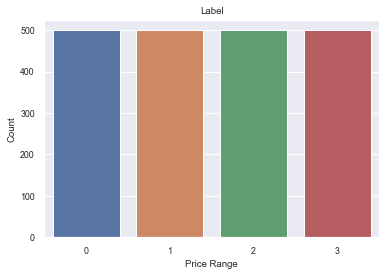

In [283]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = data_df, x="price_range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.title("Label")

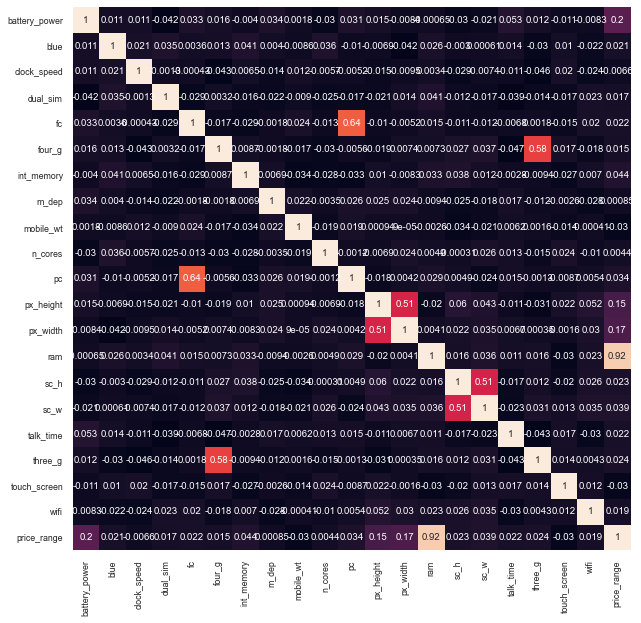

In [284]:
df_corr=data_df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [301]:
last_row_corr = df_corr.iloc[-1]

last_row_corr 

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [285]:
data_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [286]:
X = data_df[['battery_power', 'px_height','px_width', 'ram']]

In [287]:
X

,battery_power,px_height,px_width,ram
0,842,20,756,2549
1,1021,905,1988,2631
2,563,1263,1716,2603
3,615,1216,1786,2769
4,1821,1208,1212,1411
...,...,...,...,...
1995,794,1222,1890,668
1996,1965,915,1965,2032
1997,1911,868,1632,3057
1998,1512,336,670,869


In [288]:
y = data_df[['price_range']]
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [289]:
num_features = df.shape[1]

In [290]:
train_x, test_x, train_y, test_y = train_test_split(X, y,test_size=0.25,random_state=0)
print ('train_x shape:', train_x.shape)
print ('train_y shape:', train_y.shape)
print ('test_x shape:', test_x.shape)
print ('test_y shape:', test_y.shape)

train_x shape: (1500, 4)
train_y shape: (1500, 1)
test_x shape: (500, 4)
test_y shape: (500, 1)


In [291]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(train_x, train_y)


predicted = knn_classifier.predict(test_x)
print(confusion_matrix(test_y, predicted))
print(accuracy_score(test_y, predicted))

[[123   1   0   0]
 [ 11  97   2   0]
 [  0  14 107   4]
 [  0   0  20 121]]
0.896


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Gwo-Feature-Selection

In [292]:
num_features = 20

In [293]:
# Load the data
data_df = pd.read_csv('C:/Users/GC/mobile_price_dataset.csv')

In [294]:
train_data, test_data = train_test_split(data_df)

In [295]:
train_x, test_x, train_y, test_y = train_data.iloc[:, :num_features], test_data.iloc[:, :num_features], train_data.iloc[:, -1], test_data.iloc[:, -1]
print ('train_x shape:', train_x.shape)
print ('train_y shape:', train_y.shape)
print ('test_x shape:', test_x.shape)
print ('test_y shape:', test_y.shape)

train_x shape: (1500, 20)
train_y shape: (1500,)
test_x shape: (500, 20)
test_y shape: (500,)


In [296]:
train_x, test_x, train_y, test_y = train_data.iloc[:, :num_features], test_data.iloc[:, :num_features], train_data.iloc[:, -1], test_data.iloc[:, -1]
print ('train_x shape:', train_x.shape)
print ('train_y shape:', train_y.shape)
print ('test_x shape:', test_x.shape)
print ('test_y shape:', test_y.shape)

#train_y = train_df.iloc[:, 41]
#test_y = test_df.iloc[:, 41]


# Feature selection using GWO

fit = GWO(fitness_function, 0, 1, num_features, 10, 20)
selected_features = np.where(fit>0.5)[0]
#selected_features = [9,13,14,39]
print(selected_features)

train_x = train_x.iloc[:, selected_features]
test_x = test_x.iloc[:, selected_features]

knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(train_x, train_y)


predicted = knn_classifier.predict(test_x)
print(confusion_matrix(test_y, predicted))
print(accuracy_score(test_y, predicted))


train_x shape: (1500, 20)
train_y shape: (1500,)
test_x shape: (500, 20)
test_y shape: (500,)
GWO is optimizing  "fitness_function"
['At iteration 0 the best fitness is -0.8388909090909091']
alpha: [ 0  2  3  4  7  8  9 11 12 13 17]
['At iteration 1 the best fitness is -0.8388909090909091']
alpha: [ 0  2  3  4  7  8  9 11 12 13 17]
['At iteration 2 the best fitness is -0.8388909090909091']
alpha: [ 0  2  3  4  7  8  9 11 12 13 17]
['At iteration 3 the best fitness is -0.8409111111111112']
alpha: [ 0  4  5  7  8 11 12 13 17]
['At iteration 4 the best fitness is -0.8409111111111112']
alpha: [ 0  4  5  7  8 11 12 13 17]
['At iteration 5 the best fitness is -0.8423']
alpha: [ 0  5  7  8  9 11 12 13]
['At iteration 6 the best fitness is -0.8464666666666667']
alpha: [ 0  8 11 12 13 17]
['At iteration 7 the best fitness is -0.8464666666666667']
alpha: [ 0  8 11 12 13 17]
['At iteration 8 the best fitness is -0.8464666666666667']
alpha: [ 0  8 11 12 13 17]
['At iteration 9 the best fitness is 